# Intro

Het doel van deze opdracht is om uiteindelijk het gewicht doormiddel van neurale netwerken te voorspellen.

# Setup

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [36]:
csv_file = './data/palmerpenguins_original.csv'
df = pd.read_csv(csv_file)

df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


# Connections

1. Zoek eerst naar data die verschil kan hebben op het gewicht van een penguin. Zoals bijvoorbeeld species.

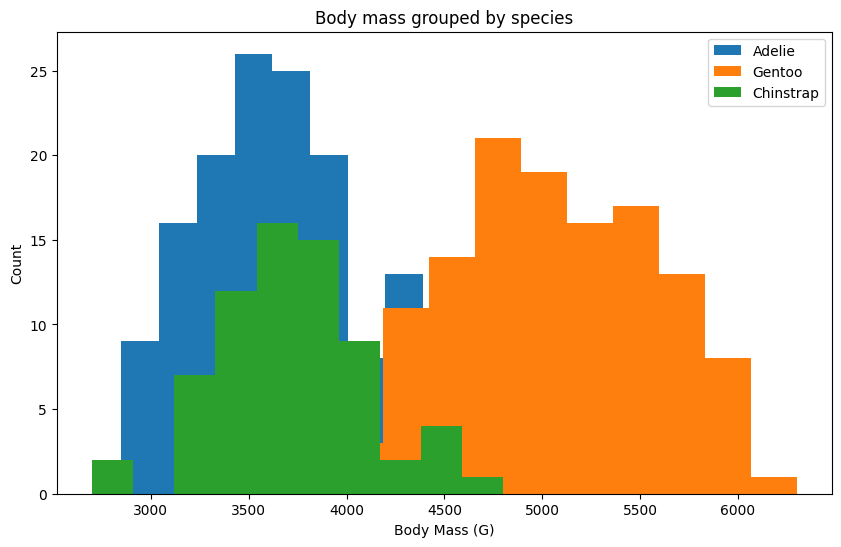

In [37]:
plt.figure(figsize=(10, 6))

for specimen in df['species'].unique():
    data = df.loc[df['species'] == specimen]['body_mass_g']
    
    plt.hist(data, label=specimen)
    

plt.title('Body mass grouped by species')
plt.legend()
plt.xlabel('Body Mass (G)')
plt.ylabel('Count')
plt.show()

2. Om het netwerk beter te trainen is het handig om zo min mogelijk data te gebruiken. En data te gebruiken dat veel invloed of correlatie heeft op de afhankelijke variable (target variable).

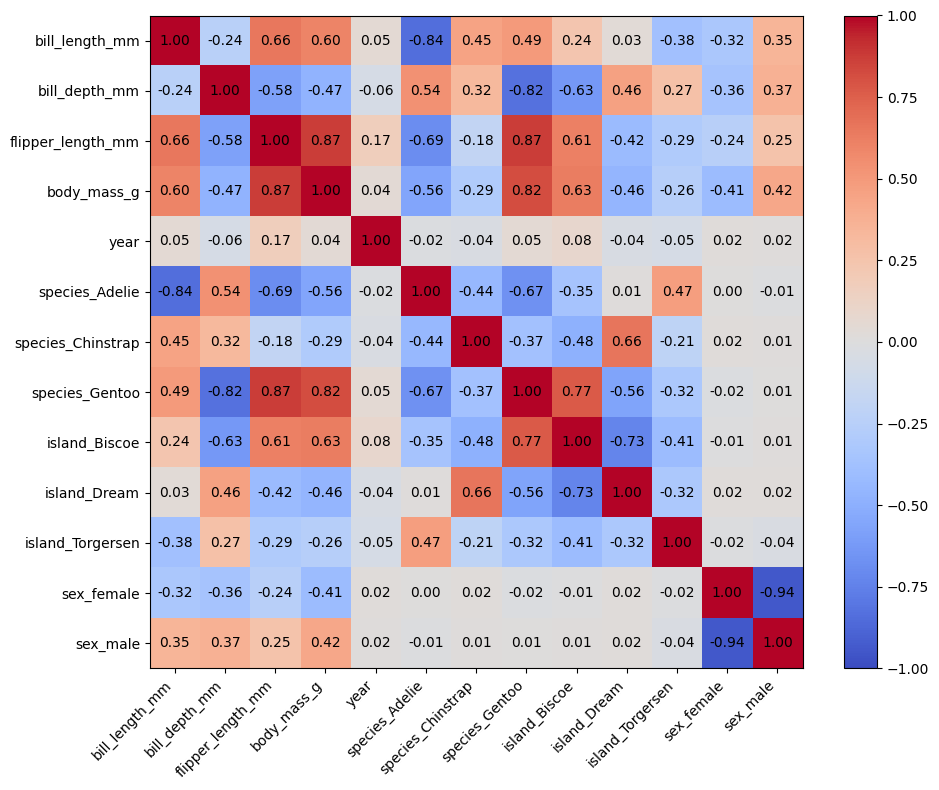

In [38]:
df_dummies = pd.get_dummies(df[['species', 'island', 'sex']])
corr_matrix = pd.concat([df.select_dtypes(['float64', 'int64']), df_dummies], axis=1).corr()

# Plot
plt.figure(figsize=(10, 8))
im = plt.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar(im)

# Add labels and values
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45, ha='right')
plt.yticks(range(len(corr_matrix.index)), corr_matrix.index)

for i in range(len(corr_matrix.index)):
    for j in range(len(corr_matrix.columns)):
        plt.text(j, i, f'{corr_matrix.iloc[i, j]:.2f}', ha='center', va='center')

plt.tight_layout()
plt.show()

In de heatmap is te zien dat flipper lengte redelijk veel invloed heeft op het gewicht. Aan het histogram hierboven is al te zien dat je doormiddel van de species al een beetje kan voorspellen. Namelijk Gentoo's zijn zwaarder.

Nu is het handig om te kijken of toevallig de flipper lengte helpt om nog een groep te onderscheiden en dus het gewicht beter in te schatten. Het plotten an de data is altijd handig.

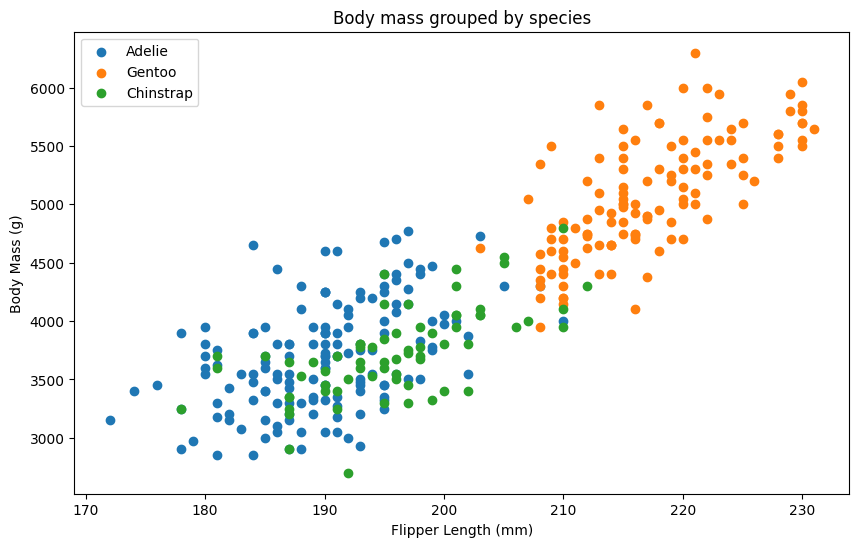

In [39]:
plt.figure(figsize=(10, 6))

for specimen in df['species'].unique():
    data = df.loc[df['species'] == specimen]
    
    plt.scatter(data['flipper_length_mm'], data['body_mass_g'], label=specimen)

plt.title('Body mass grouped by species')
plt.legend()
plt.ylabel('Body Mass (g)')
plt.xlabel('Flipper Length (mm)')
plt.show()

Hier is te zien dat inderdaad de flipper lengte veel invloed heeft op het gewicht. Alleen zijn 2 groepen nog niet te onderscheiden dus is dit niet een parameter die wij kunnen gebruiken omdat het dan een dubbele parameter is.

In de andere matrix is te zien dat hierna alleen nog bill_lenght_mm correlatie heeft met het gewicht.

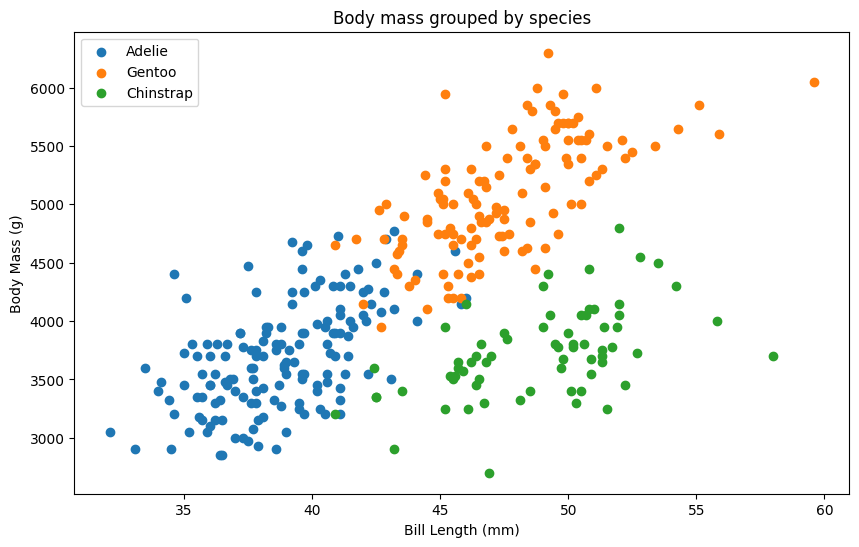

In [40]:
plt.figure(figsize=(10, 6))

for specimen in df['species'].unique():
    data = df.loc[df['species'] == specimen]
    
    plt.scatter(data['bill_length_mm'], data['body_mass_g'], label=specimen)

plt.title('Body mass grouped by species')
plt.legend()
plt.ylabel('Body Mass (g)')
plt.xlabel('Bill Length (mm)')

plt.show()

Hier is inderdaad te zien dat de penguins redelijk te onderscheiden zijn op basis van Bill Lenght dus dit is handig om te gebruiken als parameter.

Als er meer eten is op een eiland vergeleken met een andere eiland kan het natuurlijk zijn dat die pinguins zwaarder zijn dus dat is handig om te onderzoeken.

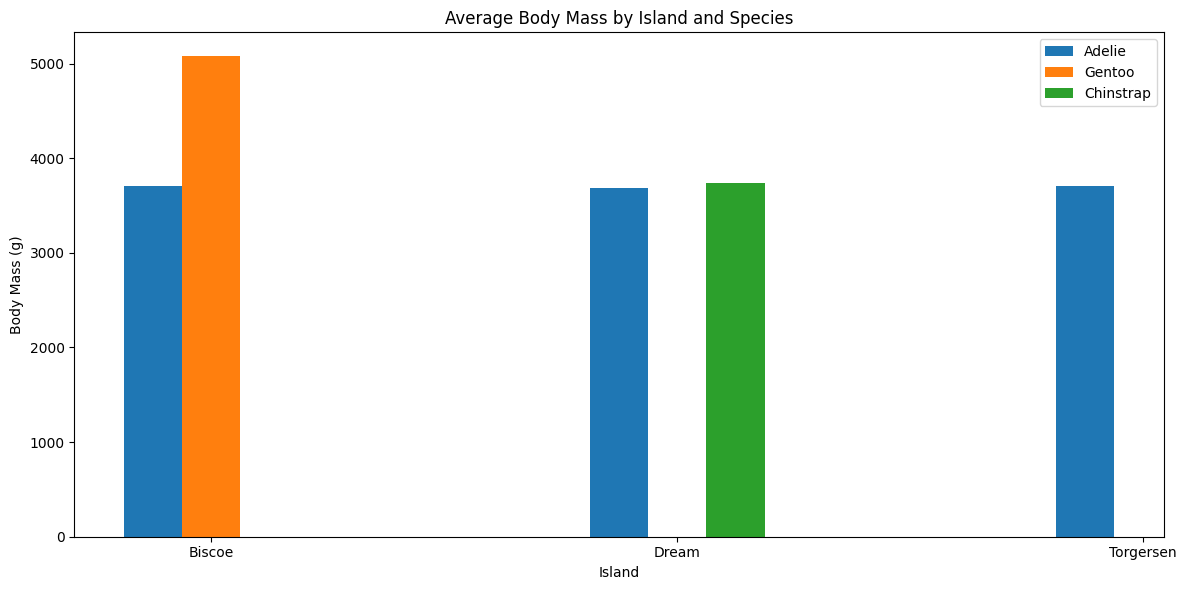

In [41]:
# First, calculate the grouped means
grouped_data = df.groupby(['island', 'species'])['body_mass_g'].mean().unstack()

# Create the plot
plt.figure(figsize=(12, 6))

islands = grouped_data.index
x = np.arange(len(islands))
width = 0.125 

for i, species in enumerate(['Adelie', 'Gentoo', 'Chinstrap']):
    if species in grouped_data.columns:
        plt.bar(x + (i - 1) * width, 
                grouped_data[species], 
                width, 
                label=species)

plt.title('Average Body Mass by Island and Species')
plt.xlabel('Island')
plt.ylabel('Body Mass (g)')
plt.xticks(x, islands)
plt.legend()

plt.tight_layout()

plt.show()

In het histogram is  te zien dat eigenlijk het eiland niet heel veel invloed heeft op het gewicht.

In de natuur is het vaak zo dat mannetjes zwaarder zijn.

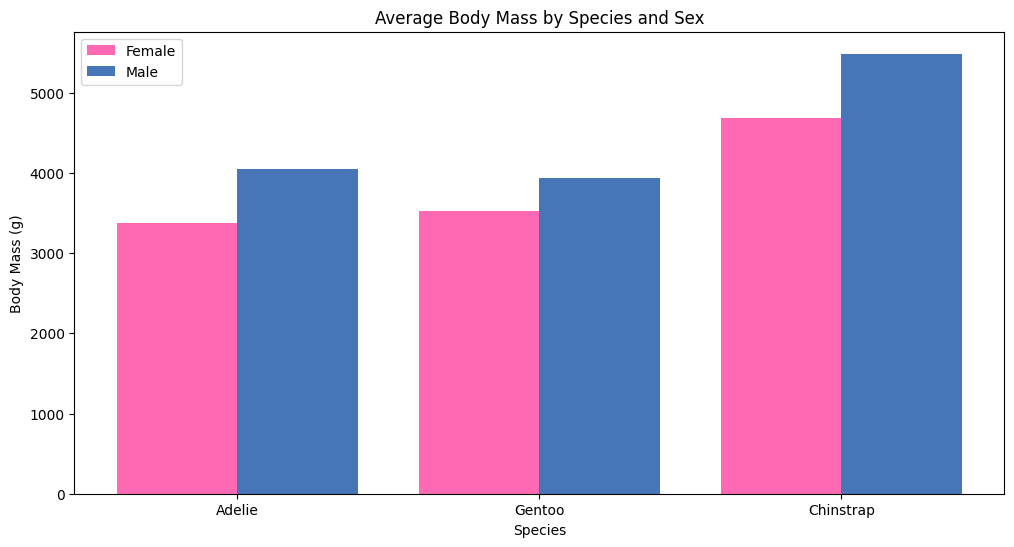

In [43]:
# Eerst groeperen we de data
grouped_data = df.groupby(['species', 'sex'])['body_mass_g'].mean().unstack()
species = df['species'].unique()

# Plot maken
plt.figure(figsize=(12, 6))
x = np.arange(len(species))

# Plot bars
plt.bar(x - 0.2, grouped_data['female'], 0.4, label='Female', color='#ff69b4')
plt.bar(x + 0.2, grouped_data['male'], 0.4, label='Male', color='#4676b8')

# Customize plot
plt.title('Average Body Mass by Species and Sex')
plt.xlabel('Species')
plt.ylabel('Body Mass (g)')
plt.xticks(x, species)
plt.legend()
plt.show()

Hier is te concluderen dat mannetjes zwaarder zijn. Dus de parameters voor het neurale netwerk zullen species, sex en bill lenght zijn.